In [48]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
p = 0.01

df = pd.read_csv(
    'MICRODADOS_ENEM_2019.csv',
    header=0,
    encoding = "ISO-8859-1",
    skiprows=lambda i: i > 0 and random.random() > p,
    sep=';'
)

df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004675,2019,1508100,Tucuruí,15,PA,23,F,1,3,...,A,A,A,C,A,A,E,A,B,B
1,190001004760,2019,1501808,Breves,15,PA,19,F,1,3,...,A,A,A,B,A,A,B,A,A,A
2,190001004812,2019,1501402,Belém,15,PA,44,M,1,3,...,A,A,A,C,A,A,C,A,B,B
3,190001004916,2019,1501725,Brasil Novo,15,PA,36,F,2,1,...,A,A,A,B,A,A,D,A,B,B
4,190001005001,2019,1501402,Belém,15,PA,19,M,1,3,...,B,A,A,E,B,B,D,B,B,B


In [50]:
df['NU_NOTA_GERAL'] = df[['NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].sum(axis=1)/5

In [53]:
deficiency = ['IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA','IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL', 'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF']
df['TP_PCD'] = df[deficiency].sum(axis=1).apply(lambda x: x>=1)

In [55]:
df['TP_COR_RACA'].replace({0: 'Não declarada',
                           1: 'Branca',
                           2: 'Preta',
                           3: 'Parda',
                           4: 'Amarela',
                           5: 'Indígena'}, inplace=True)

In [88]:
df['Q001'].replace({'A': 'Nunca estudou',
                    'B': 'Fund. incompleto',
                    'C': 'Fund. incompleto', 
                    'D': 'Medio incompleto',
                    'E': 'Medio completo',
                    'F': 'Superior completo',
                    'G': 'Pós graduação',
                    'H': 'Não sabe'}, inplace=True)

df['Q002'].replace({'A': 'Nunca estudou',
                    'B': 'Fund. incompleto',
                    'C': 'Fund. incompleto', 
                    'D': 'Medio incompleto',
                    'E': 'Medio completo',
                    'F': 'Superior completo',
                    'G': 'Pós graduação',
                    'H': 'Não sabe'}, inplace=True)

In [89]:
df = df[['SG_UF_RESIDENCIA', 'TP_SEXO', 'TP_COR_RACA', 'TP_PCD', 'Q001', 'Q002', 'Q006',
         'NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'NU_NOTA_GERAL']]

In [90]:
df.sort_values(by=['NU_NOTA_GERAL'], ascending=False, inplace=True)
df.head()

,SG_UF_RESIDENCIA,TP_SEXO,TP_COR_RACA,TP_PCD,Q001,Q002,Q006,NU_NOTA_LC,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_MT,NU_NOTA_REDACAO,NU_NOTA_GERAL
35352,MG,M,Não declarada,False,Medio completo,Pós graduação,O,676.4,707.3,754.0,985.0,960.0,816.54
29747,RJ,M,Branca,False,Superior completo,Pós graduação,P,646.0,740.9,751.8,920.7,960.0,803.88
5797,RJ,M,Branca,False,Superior completo,Pós graduação,Q,672.2,755.6,722.3,908.5,960.0,803.72
26197,SP,F,Parda,False,Pós graduação,Superior completo,C,702.4,751.2,738.8,873.9,940.0,801.26
33708,SP,M,Branca,False,Superior completo,Superior completo,I,625.0,746.0,771.5,897.7,960.0,800.04


In [91]:
df.dropna(inplace=True)
df.shape

(36723, 13)

In [92]:
top = df[:int(0.01*df.shape[0])]
top.shape

(367, 13)

In [93]:
def plot_distribution(df, column, num_labels=None):
    """Plot a horizontal stacked bar with the value distribution of a column

    Args:
        df (pandas.core.frame.DataFrame): A dataframe.
        col (str): Name of selected column.
        num_labels (int): Number of labels to be shown in legend.
    """
    
    # Generate a list with lists that contain a value and its respective incidence
    value_counts = []
    for k, v in df[column].value_counts().items():
        value_counts.append(list([k,v]))
    for count in value_counts:
        count[1]=count[1]/df.shape[0]
    
    value_counts = sorted(value_counts, key=lambda x: x[0])
    
    # Set the maximum legend label length to 50 characters, adding '...' if you exceed this limit
    try:
        legend_labels = [[count[0], count[0][:50]+'...'][len(count[0])>50] for count in value_counts[:num_labels]]    
    except: # Avoid errors if the value is not a string
        legend_labels = [count[0] for count in value_counts[:num_labels]]
    
    # Plot the chart
    fig, axes = plt.subplots(figsize=(20, 2))
    pd.DataFrame([counts[1] for counts in value_counts]).T.plot(kind='barh', stacked=True, legend=False, ax=axes)
    sns.despine(left=True)
    
    plt.legend(legend_labels, bbox_to_anchor=(0.5,-0.2), loc='upper center', ncol=3)

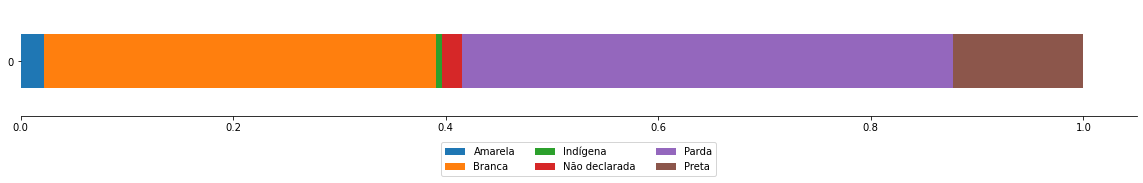

In [94]:
plot_distribution(df, 'TP_COR_RACA')

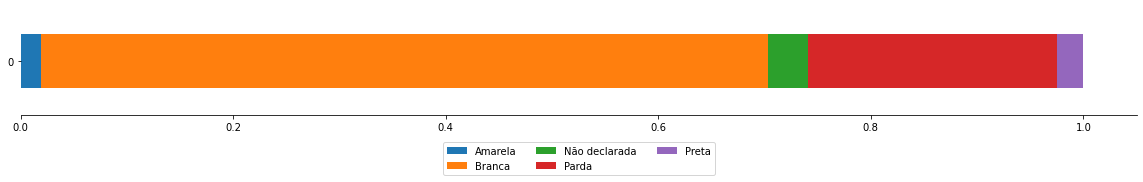

In [95]:
plot_distribution(top, 'TP_COR_RACA')

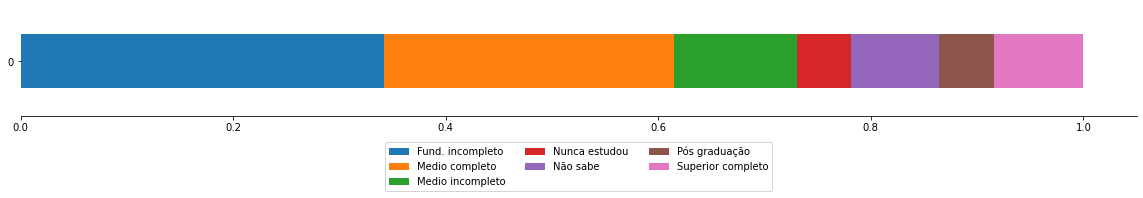

In [96]:
plot_distribution(df, 'Q001')

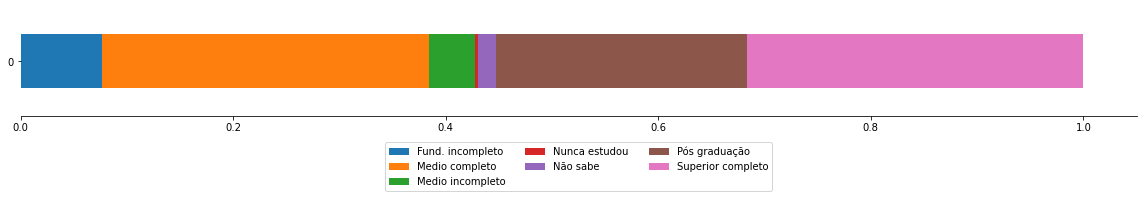

In [97]:
plot_distribution(top, 'Q001')

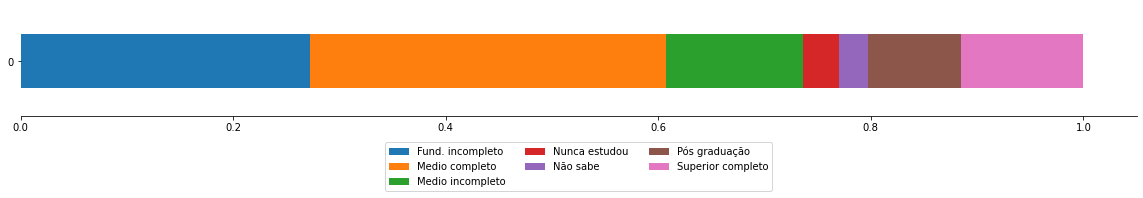

In [98]:
plot_distribution(df, 'Q002')

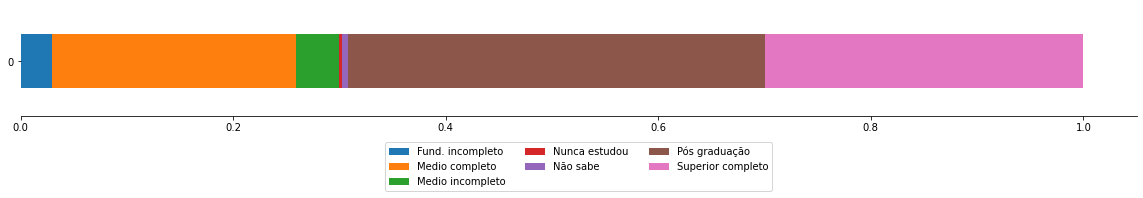

In [99]:
plot_distribution(top, 'Q002')

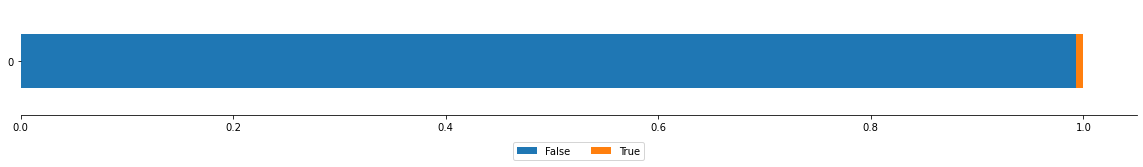

In [100]:
plot_distribution(df, 'TP_PCD')

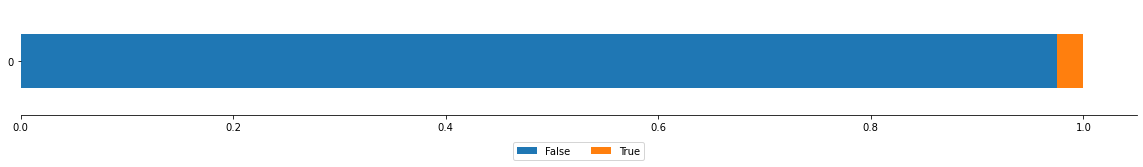

In [101]:
plot_distribution(top, 'TP_PCD')

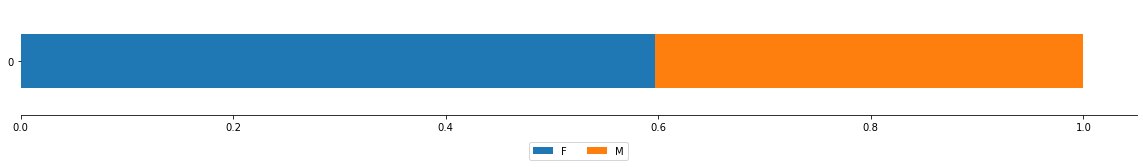

In [102]:
plot_distribution(df, 'TP_SEXO')

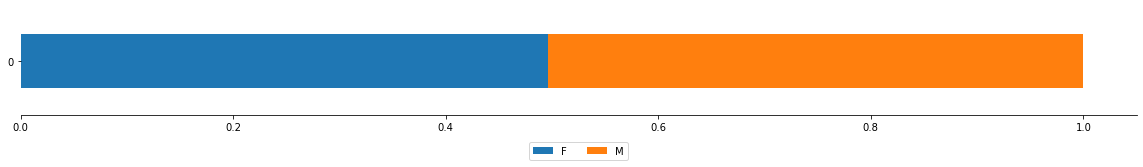

In [104]:
plot_distribution(top, 'TP_SEXO')